In [1]:
import numpy as np
import pandas as pd
import gensim
import re

# import lucem_illud
# from pandarallel import pandarallel
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

# pandarallel.initialize(progress_bar=True)


Bad key text.latex.preview in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig

In [2]:
data = pd.read_csv('../data/csv_data/dtm_data.csv')
data.head()

,id,length,date,country,publisher,snippet,body,body_tokens,body_tokens_normalized,snippet_tokens,trunc_sentence,sentiment_score,neg_sentim_score,body_tokens_reduced
0,88033929,554,21-10-01,US,New York Times,A pilot program hints at an eventual end to Au...,A pilot program hints at an eventual end to A...,"['A', 'pilot', 'program', 'hints', 'at', 'an',...","['pilot', 'program', 'hints', 'eventual', 'end...","['A', 'pilot', 'program', 'hints', 'at', 'an',...","[""A pilot program hints at an eventual end to ...","[{'label': 'NEGATIVE', 'score': 0.978422582149...",0.400000,"['pilot', 'program', 'hints', 'eventual', 'end..."
1,88035715,7205,21-10-01,US,New York Times,Merck says a trial shows it has produced the f...,Covid News : U.S. Parents ' Views Are Shiftin...,"['Covid', 'News', 'U.S.', 'Parents', 'Views', ...","['covid', 'news', 'us', 'parents', 'views', 's...","['Merck', 'says', 'a', 'trial', 'shows', 'it',...","['Covid News : U', ""Parents ' Views Are Shifti...","[{'label': 'NEGATIVE', 'score': 0.732781469821...",0.666667,"['covid', 'news', 'parents', 'views', 'shiftin..."
2,88046027,300,21-10-03,US,Fox News,Fauci defends California school vaccine mandat...,""" I have been and I still am in favor of thes...","['I', 'have', 'been', 'and', 'I', 'still', 'am...","['favor', 'kinds', 'mandates', 'fauci', 'said'...","['Fauci', 'defends', 'California', 'school', '...","['"" I have been and I still am in favor of the...","[{'label': 'POSITIVE', 'score': 0.997584581375...",0.500000,"['favor', 'kinds', 'mandates', 'fauci', 'abc',..."
3,88046227,501,21-10-03,US,New York Times,Israel will require a booster shot to be consi...,Israel will require a booster shot to be cons...,"['Israel', 'will', 'require', 'a', 'booster', ...","['israel', 'require', 'booster', 'shot', 'cons...","['Israel', 'will', 'require', 'a', 'booster', ...",['Israel will require a booster shot to be con...,"[{'label': 'NEGATIVE', 'score': 0.997277677059...",0.800000,"['israel', 'require', 'booster', 'shot', 'cons..."
4,88055023,1417,21-10-05,US,New York Times,How Do Thousands Prepare for a Climate Summit?...,"In a few weeks , an estimated 20,000 minister...","['In', 'a', 'few', 'weeks', 'an', 'estimated',...","['weeks', 'estimated', 'ministers', 'activists...","['How', 'Do', 'Thousands', 'Prepare', 'for', '...","['In a few weeks , an estimated 20,000 ministe...","[{'label': 'POSITIVE', 'score': 0.997138023376...",0.500000,"['weeks', 'estimated', 'ministers', 'activists..."


In [3]:
data['year_month'] = data['date'].apply(lambda x: x[: 5])
data.sort_values(by=['year_month'], inplace=True)
docs_per_time_slice = data['year_month'].value_counts()

In [5]:
health = pd.read_csv('../data/csv_data/us_covid_health_df.csv')
health.head()

,Unnamed: 0,date,country,publisher,trunc_sentence,sentiment_score,topic,sentences,new_negativ_sent_score,new_cases,...,new_vaccinations,new_people_vaccinated_smoothed_per_hundred,total_cases,new_cases_smoothed,new_deaths_smoothed,hosp_patients,icu_patients,weekly_icu_admissions,new_vaccinations_smoothed,health_date
0,0,21-10-01,US,pe.com,"["" ( File photo by Watchara Phomicinda , The P...","[{'label': 'NEGATIVE', 'score': 0.990002155303...",4,"["" County's milestone comes after it hit 4,000...",0.635670,154750.0,...,1296371.0,0.078,43681514.0,110009.857,1961.286,67124.0,19272.0,NaN,971025.0,21-10-01
1,1,21-10-01,US,pe.com,"[' 5 , 2020 file photo , a sign for Wall Stree...","[{'label': 'NEGATIVE', 'score': 0.756866037845...",0,[' Stocks rebound but still close out worst we...,0.486958,154750.0,...,1296371.0,0.078,43681514.0,110009.857,1961.286,67124.0,19272.0,NaN,971025.0,21-10-01
2,2,21-10-01,US,kwch.com,"[' 1 , 2021 /PRNewswire/ - Metalla Royalty &am...","[{'label': 'NEGATIVE', 'score': 0.970434188842...",1,[' ( All Currency is in United States ( US$ ) ...,0.747285,154750.0,...,1296371.0,0.078,43681514.0,110009.857,1961.286,67124.0,19272.0,NaN,971025.0,21-10-01
3,3,21-10-01,US,wtkr.com,[' The league-wide rate is now around 95% whe...,"[{'label': 'NEGATIVE', 'score': 0.993281245231...",1,[' MIAMI ( AP ) -- The NBA has seen a rise in ...,0.754951,154750.0,...,1296371.0,0.078,43681514.0,110009.857,1961.286,67124.0,19272.0,NaN,971025.0,21-10-01
4,4,21-10-01,US,YAHOO!Finance,[' ( NYSE:MDLA ) relating to its proposed acqu...,"[{'label': 'NEGATIVE', 'score': 0.971785485744...",1,"[' NEW YORK , NY / ACCESSWIRE / October 1 , 20...",0.518069,154750.0,...,1296371.0,0.078,43681514.0,110009.857,1961.286,67124.0,19272.0,NaN,971025.0,21-10-01


In [21]:
nyt_fox = health[(health['publisher'] == 'New York Times') | (health['publisher'] == 'Fox News')].copy()

nyt_fox[['publisher', 'new_negativ_sent_score', 'date']]

,publisher,new_negativ_sent_score,date
28,New York Times,0.407861,21-10-01
39,New York Times,0.893257,21-10-01
170,Fox News,0.752583,21-10-03
173,New York Times,0.771948,21-10-03
270,New York Times,0.615946,21-10-05
...,...,...,...
50964,New York Times,0.605400,22-01-30
50989,New York Times,0.750658,22-01-30
50990,New York Times,0.772675,22-01-30
51109,New York Times,0.403700,22-01-31


In [28]:
pd.merge(data, nyt_fox[['publisher', 'new_negativ_sent_score', 'date']], on=['date', 'publisher'])

,id,length,date,country,publisher,snippet,body,body_tokens,body_tokens_normalized,snippet_tokens,trunc_sentence,sentiment_score,neg_sentim_score,body_tokens_reduced,year_month,new_negativ_sent_score
0,86664344,350,21-01-28,US,Fox News,Stranded drivers get COVID-19 vaccine while st...,"Michael Weber , Josephine County's public hea...","['Michael', 'Weber', 'Josephine', 'County', ""'...","['michael', 'weber', 'josephine', 'county', 'p...","['Stranded', 'drivers', 'get', 'COVID-19', 'va...","[""Michael Weber , Josephine County's public he...","[{'label': 'POSITIVE', 'score': 0.999016165733...",0.600000,"['michael', 'weber', 'josephine', 'county', 'p...",21-01,0.931009
1,86664344,350,21-01-28,US,Fox News,Stranded drivers get COVID-19 vaccine while st...,"Michael Weber , Josephine County's public hea...","['Michael', 'Weber', 'Josephine', 'County', ""'...","['michael', 'weber', 'josephine', 'county', 'p...","['Stranded', 'drivers', 'get', 'COVID-19', 'va...","[""Michael Weber , Josephine County's public he...","[{'label': 'POSITIVE', 'score': 0.999016165733...",0.600000,"['michael', 'weber', 'josephine', 'county', 'p...",21-01,0.748363
2,86664344,350,21-01-28,US,Fox News,Stranded drivers get COVID-19 vaccine while st...,"Michael Weber , Josephine County's public hea...","['Michael', 'Weber', 'Josephine', 'County', ""'...","['michael', 'weber', 'josephine', 'county', 'p...","['Stranded', 'drivers', 'get', 'COVID-19', 'va...","[""Michael Weber , Josephine County's public he...","[{'label': 'POSITIVE', 'score': 0.999016165733...",0.600000,"['michael', 'weber', 'josephine', 'county', 'p...",21-01,0.787946
3,86665451,221,21-01-28,US,Fox News,Super Bowl 2021 attendees to have additional m...,""" We're passing an additional mask order that...","['We', ""'re"", 'passing', 'an', 'additional', '...","['passing', 'additional', 'mask', 'order', 're...","['Super', 'Bowl', '2021', 'attendees', 'to', '...","['"" We\'re passing an additional mask order th...","[{'label': 'NEGATIVE', 'score': 0.993959426879...",0.833333,"['passing', 'additional', 'mask', 'order', 're...",21-01,0.931009
4,86665451,221,21-01-28,US,Fox News,Super Bowl 2021 attendees to have additional m...,""" We're passing an additional mask order that...","['We', ""'re"", 'passing', 'an', 'additional', '...","['passing', 'additional', 'mask', 'order', 're...","['Super', 'Bowl', '2021', 'attendees', 'to', '...","['"" We\'re passing an additional mask order th...","[{'label': 'NEGATIVE', 'score': 0.993959426879...",0.833333,"['passing', 'additional', 'mask', 'order', 're...",21-01,0.748363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,88585220,1844,22-01-07,US,Fox News,Tucker Carlson: NPR is destroying itself from ...,If you have been living in America over the p...,"['If', 'you', 'have', 'been', 'living', 'in', ...","['living', 'america', 'past', 'year', 'definit...","['Tucker', 'Carlson', 'NPR', 'is', 'destroying...",['If you have been living in America over the ...,"[{'label': 'POSITIVE', 'score': 0.996804952621...",0.500000,"['living', 'america', 'past', 'year', 'definit...",22-01,0.644178
6140,88585155,381,22-01-07,US,Fox News,Almost half of reported NY COVID-19 hospitaliz...,Over half of COVID-19 hospitalizations in NYC...,"['Over', 'half', 'of', 'COVID-19', 'hospitaliz...","['half', 'covid19', 'hospitalizations', 'nyc',...","['Almost', 'half', 'of', 'reported', 'NY', 'CO...","[""Over half of COVID-19 hospitalizations in NY...","[{'label': 'NEGATIVE', 'score': 0.992072165012...",0.666667,"['half', 'covid19', 'hospitalizations', 'nyc',...",22-01,0.872461
6141,88585155,381,22-01-07,US,Fox News,Almost half of reported NY COVID-19 hospitaliz...,Over half of COVID-19 hospitalizations in NYC...,"['Over', 'half', 'of', 'COVID-19', 'hospitaliz...","['half', 'covid19', 'hospitalizations', 'nyc',...","['Almost', 'half', 'of', 'reported', 'NY', 'CO...","[""Over half of COVID-19 hospitalizations in NY...","[{'label': 'NEGATIVE', 'score': 0.992072165012...",0.66666

In [29]:
re.sub('[^0-9a-zA-Z ]+', '', data['trunc_sentence'][0].split(',')[0])

'A pilot program hints at an eventual end to Australias hotel quarantine system'

In [30]:
data['trunc_sentence'] = data['trunc_sentence'].apply(lambda x: [re.sub('[^0-9a-zA-Z ]+', '', k) 
                                                                          for k in x.split(',')])

In [31]:
data['head_sentence'] = data['trunc_sentence'].apply(lambda x: ''.join(x))

In [32]:
# data['head_sent_tokens'] = data['head_sentence'].parallel_apply(lambda x: lucem_illud.word_tokenize(x))
# data['head_sent_tokens_normalized'] = data['head_sent_tokens'].parallel_apply(lambda x: 
#                                                                               lucem_illud.normalizeTokens(x))

In [33]:
# stop_words = list(gensim.parsing.preprocessing.STOPWORDS)
# stop_words.append('said')
# stop_words.append('like')
# stop_words.append('year')
# stop_words.append('years')

In [34]:
# covidTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.98, min_df=2, 
#                                                                     stop_words=stop_words, norm='l2')
# covidTFVects = covidTFVectorizer.fit_transform(data['head_sentence'])

In [35]:
# def dropMissing(wordLst, vocab):
#     return [w for w in wordLst if w in vocab]

# data['head_tokens_reduced'] = data['head_sent_tokens_normalized'].apply(lambda x: dropMissing(x, 
#                                                                                covidTFVectorizer.vocabulary_.keys()))

In [36]:
# dictionary = gensim.corpora.Dictionary(data['head_tokens_reduced'])

In [37]:
# corpus = [dictionary.doc2bow(text) for text in data['head_tokens_reduced']]

In [38]:
# %%time
# ldaseq = gensim.models.ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, 
#                                                time_slice=docs_per_time_slice, num_topics=4)
# ldaseq.savea('../models/ldaseq')

In [39]:
ldaseq = gensim.models.ldaseqmodel.LdaSeqModel.load('../models/ldaseq')

In [40]:
pd.DataFrame(ldaseq.print_topics(time=0)).T

,0,1,2,3
0,"(vaccine, 0.009454470876067798)","(president, 0.013641275056517629)","(new, 0.01566273518246878)","(news, 0.013061402446485005)"
1,"(johnson, 0.00810912834166912)","(new, 0.011214721441926695)","(coronavirus, 0.014525834543318801)","(fox, 0.01183298734532905)"
2,"(coronavirus, 0.006730319440837836)","(biden, 0.010479474934436912)","(vaccine, 0.011423175066328723)","(new, 0.010352664779940731)"
3,"(health, 0.005512914858897924)","(state, 0.007917077620449749)","(covid19, 0.009844411263813559)","(headlines, 0.008114704103289178)"
4,"(united, 0.004984869906267413)","(cuomo, 0.0074890182279591655)","(people, 0.009263647986103416)","(check, 0.007692299253307006)"
5,"(pandemic, 0.004956536958047869)","(york, 0.006630285612272356)","(pandemic, 0.009068776770303098)","(clicking, 0.007518459081629683)"
6,"(countries, 0.00493360086067373)","(house, 0.006453531675604638)","(york, 0.00693967825742242)","(flash, 0.0074472276782893915)"
7,"(people, 0.004901436276702974)","(coronavirus, 0.005851117995852263)","(times, 0.005835417647952003)","(mask, 0.007390044098689939)"
8,"(china, 0.004805076370991865)","(trump, 0.005345809133873205)","(states, 0.005417872923821173)","(foxnews, 0.007369925538755617)"
9,"(states, 0.004694350117586747)","(news, 0.0051702525045062295)","(health, 0.005221347356450321)","(people, 0.007130257483487965)"


In [41]:
data['dtm'] = [np.argmax(ldaseq.doc_topics(i)) for i in range(data.shape[0])]

In [42]:
time_trends = data.groupby(['year_month', 'dtm']).size().reset_index()
time_trends['year_month'] = pd.to_datetime(time_trends['year_month'], format="%y-%m")

In [43]:
time_trends.head()

,year_month,dtm,0
0,2021-01-01,0,26
1,2021-01-01,1,32
2,2021-01-01,2,61
3,2021-01-01,3,25
4,2021-02-01,0,25


In [44]:
us_covid_cases = pd.read_csv('../data/us_covid_cases.csv')
us_covid_cases['year_month'] = us_covid_cases['date'].apply(lambda x: pd.to_datetime(x[: 5], format="%y-%m"))
us_covid_cases.head()

,new_cases,new_deaths,date,new_vaccinations,new_people_vaccinated_smoothed_per_hundred,total_cases,new_cases_smoothed,new_deaths_smoothed,hosp_patients,icu_patients,weekly_icu_admissions,new_vaccinations_smoothed,year_month
0,NaN,NaN,20-01-22,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
1,0.0,NaN,20-01-23,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
2,1.0,NaN,20-01-24,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
3,0.0,NaN,20-01-25,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
4,3.0,NaN,20-01-26,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01


In [45]:
us_covid_cases = us_covid_cases[(us_covid_cases['date'] >= '21-01-01') & 
                                (us_covid_cases['date'] <= '21-12-31')].copy()

In [46]:
vax_month = us_covid_cases.groupby(['year_month'])['new_people_vaccinated_smoothed_per_hundred'].mean().reset_index()

In [47]:
topic_trends = time_trends.pivot(index=['year_month'], columns=['dtm'], values=[0]).reset_index()
vax_topic = pd.merge(vax_month, topic_trends, on=['year_month'])
vax_topic.rename(columns={(0, 0): 'vaccination', (0, 1): 'politics', (0, 2): 'new cases', (0, 3): 'mask'}, 
                 inplace=True)

/home/wenqian/ipykernel_2317726/1749717249.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  vax_topic = pd.merge(vax_month, topic_trends, on=['year_month'])
/software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


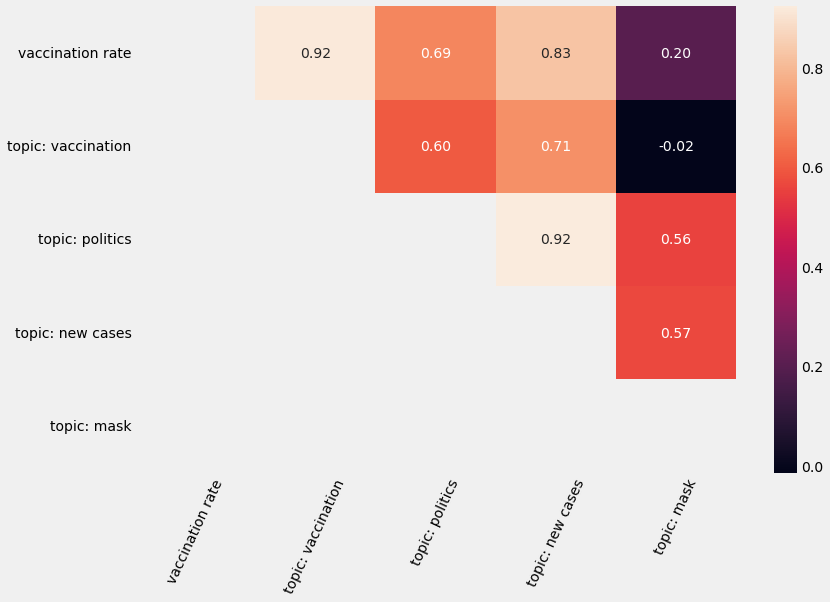

In [48]:
corr = np.corrcoef(vax_topic.drop(columns=['year_month']), rowvar=False)
features = ['vaccination rate', 'topic: vaccination', 'topic: politics', 'topic: new cases', 'topic: mask']
mask = np.tril(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr, fmt='.2f',
            xticklabels=features,
           yticklabels=features, annot=True, mask=mask)
g = plt.xticks(rotation=65)
# plt.savefig('../img/corr_topics.png', dpi=300, bbox_inches='tight')

/software/python-anaconda-2020.11-el8-x86_64/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


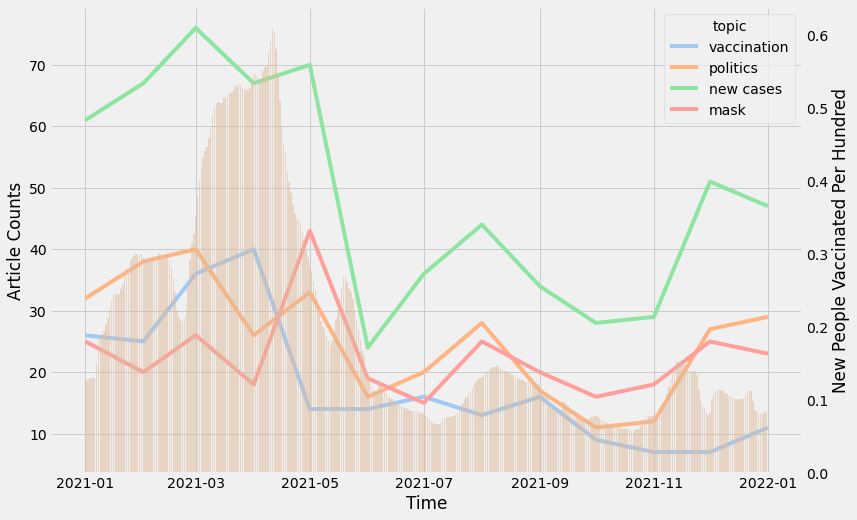

In [49]:
fig = plt.figure(figsize=(12, 8))
sns.lineplot(pd.to_datetime(time_trends['year_month']), time_trends[0], hue=time_trends['dtm'], 
             palette=sns.color_palette("pastel")[: 4])
plt.legend(['vaccination', 'politics', 'new cases', 'mask'], title='topic')
plt.ylabel('Article Counts')
plt.xlabel('Time')
ax2 = plt.twinx()
ax2.bar(x=pd.to_datetime(us_covid_cases['date'], format="%y-%m-%d"), 
        height=us_covid_cases['new_people_vaccinated_smoothed_per_hundred'], alpha=0.5, 
        color=sns.color_palette("pastel")[5])
ax2.set_ylabel('New People Vaccinated Per Hundred')
ax2.grid(False)

# plt.savefig('../img/topic_trends.png', dpi=300, bbox_inches='tight')

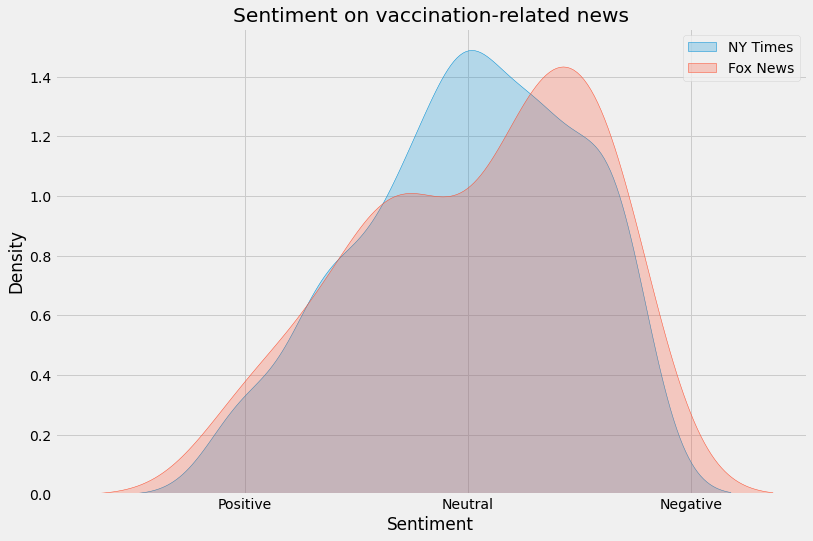

In [50]:
nyt_vax = data[(data['publisher'] == 'New York Times') & (data['dtm'] == 0)].copy()
fox_vax = data[(data['publisher'] == 'Fox News') & (data['dtm'] == 0)].copy()

figure = plt.figure(figsize=(12, 8))
sns.kdeplot(nyt_vax['neg_sentim_score'], fill=True, label='NY Times')
sns.kdeplot(fox_vax['neg_sentim_score'], fill=True, label='Fox News')
plt.title('Sentiment on vaccination-related news')
plt.xlabel('Sentiment')
plt.xticks([0, 0.5, 1], ['Positive', 'Neutral', 'Negative'])
plt.legend()
# plt.savefig('../img/sentiment_vax.png', dpi=300)

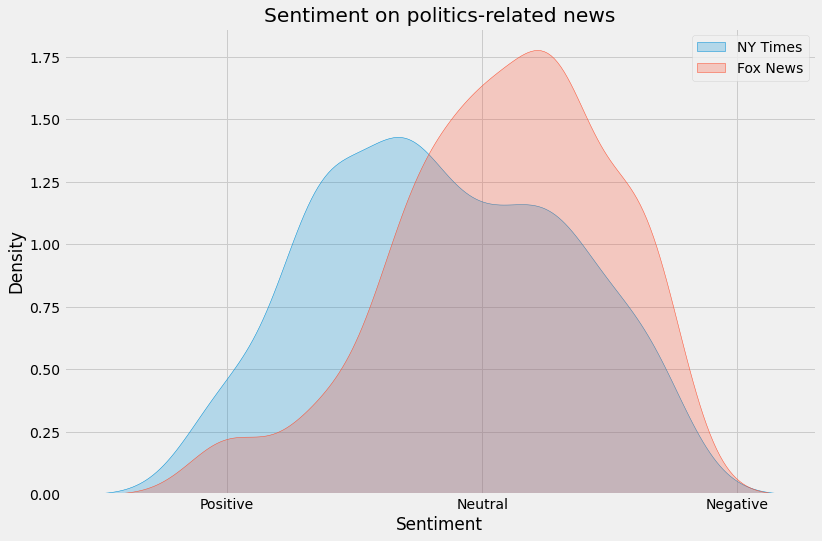

In [51]:
nyt_pol = data[(data['publisher'] == 'New York Times') & (data['dtm'] == 1)].copy()
fox_pol = data[(data['publisher'] == 'Fox News') & (data['dtm'] == 1)].copy()

figure = plt.figure(figsize=(12, 8))
sns.kdeplot(nyt_pol['neg_sentim_score'], fill=True, label='NY Times')
sns.kdeplot(fox_pol['neg_sentim_score'], fill=True, label='Fox News')
plt.title('Sentiment on politics-related news')
plt.xlabel('Sentiment')
plt.xticks([0, 0.5, 1], ['Positive', 'Neutral', 'Negative'])
plt.legend()
# plt.savefig('../img/sentiment_pol.png', dpi=300)

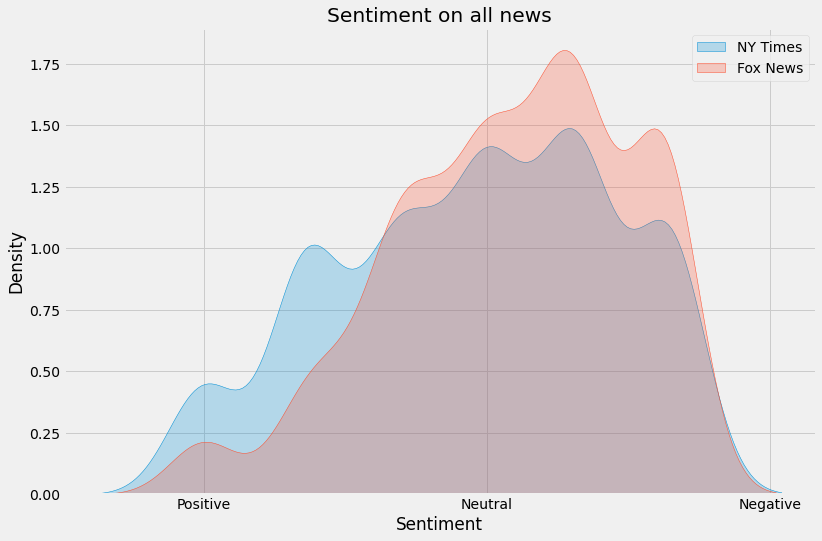

In [52]:
nyt = data[(data['publisher'] == 'New York Times')].copy()
fox = data[(data['publisher'] == 'Fox News')].copy()

figure = plt.figure(figsize=(12, 8))
sns.kdeplot(nyt['neg_sentim_score'], fill=True, label='NY Times')
sns.kdeplot(fox['neg_sentim_score'], fill=True, label='Fox News')
plt.title('Sentiment on all news')
plt.xlabel('Sentiment')
plt.xticks([0, 0.5, 1], ['Positive', 'Neutral', 'Negative'])
plt.legend()
# plt.savefig('../img/sentiment_all.png', dpi=300)

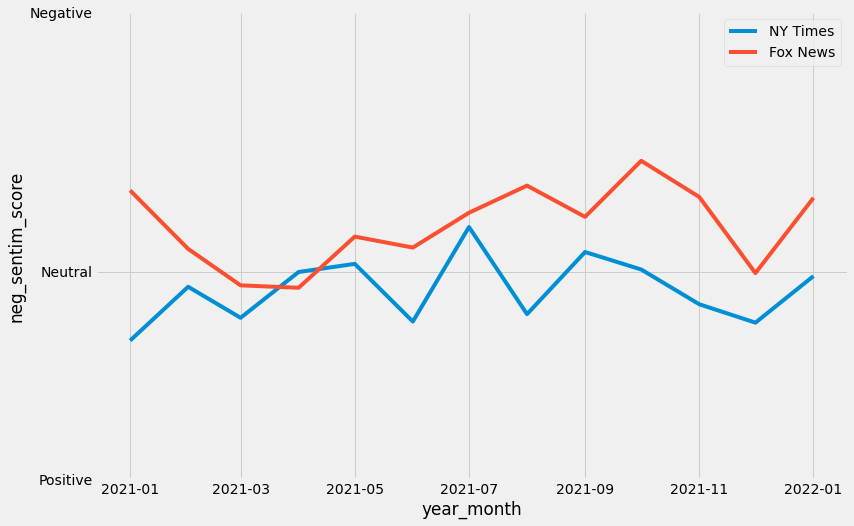

In [53]:
nyt_vax_monthly = nyt.groupby(['year_month'])['neg_sentim_score'].mean().reset_index()
fox_vax_monthly = fox.groupby(['year_month'])['neg_sentim_score'].mean().reset_index()

fig = plt.figure(figsize=(12, 8))
sns.lineplot(x=pd.to_datetime(nyt_vax_monthly['year_month'], format="%y-%m"), 
                y=nyt_vax_monthly['neg_sentim_score'], label='NY Times')
sns.lineplot(x=pd.to_datetime(fox_vax_monthly['year_month'], format="%y-%m"), 
                y=fox_vax_monthly['neg_sentim_score'], label='Fox News')
plt.yticks([0.3, 0.5, 0.75], ['Positive', 'Neutral', 'Negative'])
plt.legend()

In [54]:
fox_vax[fox_vax['snippet'].map(lambda x: 'vaccine' in x.lower())]['snippet']

1066    Biden shifts on vaccine under pressure from .....
520     Johnson & Johnson submits COVID-19 vaccine to ...
1265    Johnson & Johnson COVID-19 vaccine pause sign ...
1248    Tucker Carlson: Two COVID vaccine questions th...
1247    CDC investigating death possibly connected to ...
686     William Shakespeare, 1st man in world to get a...
1312    Houston Methodist Hospital sued by nurses over...
771     MSNBC's Joy Reid addresses Nicki Minaj dustup,...
50      Chicago police union boss on vaccine mandate f...
Name: snippet, dtype: object

In [55]:
fox_vax.loc[50]['snippet']

"Chicago police union boss on vaccine mandate fight: 'Welcome to day three of 'The Hunger Games''"

In [56]:
nyt[nyt['snippet'].map(lambda x: 'vaccin' in x.lower())].loc[1002]['snippet']

"`We Have Work to Do': More New Yorkers Receive Vaccine"

In [57]:
from scipy import stats

In [64]:
stats.ttest_ind(nyt['neg_sentim_score'], fox['neg_sentim_score'], equal_var=False, alternative='less')

Ttest_indResult(statistic=-5.3206866025940895, pvalue=6.039251800567672e-08)

In [65]:
stats.ttest_ind(nyt_pol['neg_sentim_score'], fox_pol['neg_sentim_score'], equal_var=False, alternative='less')

Ttest_indResult(statistic=-4.85528046612769, pvalue=9.330496238777367e-07)

In [66]:
stats.ttest_ind(nyt_vax['neg_sentim_score'], fox_vax['neg_sentim_score'], equal_var=False, alternative='less')

Ttest_indResult(statistic=-0.3713622311511092, pvalue=0.3556394931701765)

In [67]:
stats.ttest_ind(nyt_vax['neg_sentim_score'], fox_vax['neg_sentim_score'], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-0.3713622311511092, pvalue=0.711278986340353)

In [78]:
stats.ks_2samp(nyt['neg_sentim_score'], fox['neg_sentim_score'], alternative='greater')

KstestResult(statistic=0.12846293235175496, pvalue=7.372268576468124e-06)

In [71]:
stats.ks_2samp(nyt_pol['neg_sentim_score'], fox_pol['neg_sentim_score'], alternative='greater')

KstestResult(statistic=0.28519480519480517, pvalue=1.1037480374543025e-06)

In [74]:
stats.ks_2samp(nyt_vax['neg_sentim_score'], fox_vax['neg_sentim_score'], alternative='greater')

KstestResult(statistic=0.10473515248796147, pvalue=0.36249001672647124)

In [75]:
stats.wasserstein_distance(nyt['neg_sentim_score'], fox['neg_sentim_score'])

0.06427400628760524

In [76]:
stats.wasserstein_distance(nyt_pol['neg_sentim_score'], fox_pol['neg_sentim_score'])

0.11953679653679655

In [77]:
stats.wasserstein_distance(nyt_vax['neg_sentim_score'], fox_vax['neg_sentim_score'])

0.03481139646869984